In [21]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd


#1.)
def buyshares(mu, sigma, currprice, expprofit, expprob):
    rv = stats.norm(mu, sigma)
    inversecdf = rv.sf(expprob) 
    
    tobuy = expprofit / ((currprice*(1+mu)-currprice))
    
    return(print("At a probability of {0}, buying {1:4.2f} shares will net ${2:4.4f} in profit.".format(inversecdf, tobuy, expprofit)))

    

buyshares(.12, .06, 35, 1000, .9)

At a probability of 6.117164399549704e-39, buying 238.10 shares will net $1000.0000 in profit.


In [13]:
#2.)
from math import sqrt
from statistics import mean

# L = sample of numbers
# t = threshold
# alpha = significance level
def testmean(L, t, alpha):
    samplesize = len(L)
    samplemean = mean(L)
    S = stats.tstd(L)
    mu = t
    z = (samplemean-mu) / (S/np.sqrt(samplesize))
    
    if(alpha != None):
        half_alpha = alpha/2
        #z_half_alpha = stats.norm().ppf(1-half_alpha)
        if (np.abs(z)>t):
            print("The mean radium-226 level in the sample is greater than the EPA limit.")
            print("|z| = {0:4.4f}".format(np.abs(z)))
        else:
            print("The mean radium-226 level in the sample is less than the EPA limit.")
            print("|z| = {0:4.4f}".format(np.abs(z)))
    else:
        norm = stats.norm()
        p = norm.cdf(-z)*2
        print("The mean radium-226 level in the sample is less than than the EPA limit.")
        print("p-value = {0:4.4f}".format(p))    

# (a)
L = [1.46, .58, 4.31, 1.02, .17, 2.92, .91, .43, .91, 1.3, 8.24, 3.51, 6.87, 1.43, 1.44, 4.49, 4.21, 1.84, 5.92, 1.86, 1.41, 1.7, 2.02, 1.65, 1.4, .75]
testmean(L, 4, .1)
print()

# (b)
L2 = [3.23, 4.16, 4.47, 3.4, 4.02, 4.33, 4.05, 4.14, 4.23, 3.38, 4.91, 4.02, 4.23, 4.54, 4.14, 4.13, 4.21, 4.66, 4.73, 4.05, 4.1, 4.11, 4.21, 4.34, 4.22, 4.21, 4.34, 4.35, 4.32, 4.47]
testmean(L2, 4, None)

The mean radium-226 level in the sample is less than the EPA limit.
|z| = 3.8879

The mean radium-226 level in the sample is less than than the EPA limit.
p-value = 0.0038


C:\Users\tmarr\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


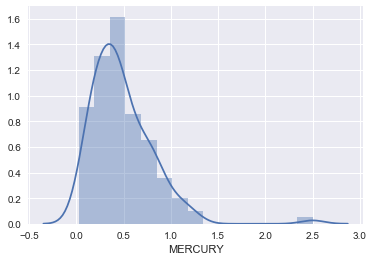

C:\Users\tmarr\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


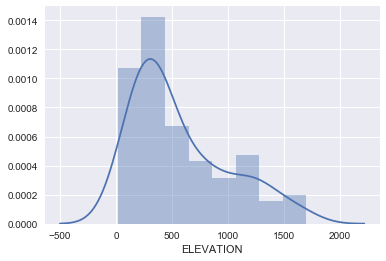

C:\Users\tmarr\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\tmarr\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


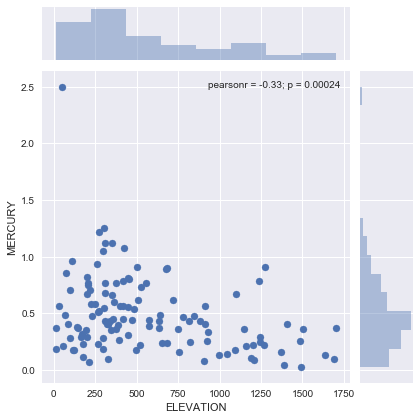

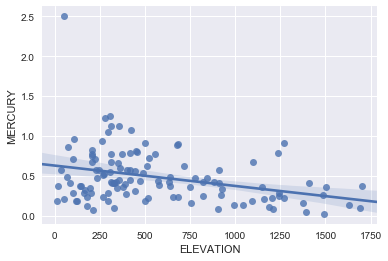

                            OLS Regression Results                            
Dep. Variable:                MERCURY   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     14.39
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           0.000236
Time:                        22:33:30   Log-Likelihood:                -31.010
No. Observations:                 120   AIC:                             66.02
Df Residuals:                     118   BIC:                             71.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6298      0.048     13.167      0.0

(120,)

In [29]:
#3.)
#part e is incomplete
import requests
import math
from scipy import stats, integrate
import seaborn as sns
from pylab import show
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

sns.set(color_codes=True)

df = pd.read_excel('MAINELAKE.XLS')

#(a)
sns.distplot(df['MERCURY'])
show()
sns.distplot(df['ELEVATION'])
show()

#(b)
display(sns.jointplot(df['ELEVATION'], df['MERCURY']))
show()

#(c)
sns.regplot(x=df['ELEVATION'], y=df['MERCURY'])
show()

#(d)
x = df['ELEVATION']
y = df['MERCURY']
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
print(results.params)
b = results.params
print()
print()
print("Values: B_0 = {0:4.5f} and B_1 = {1:4.5f}".format(b[0], b[1]))

#(e)
#v = df.ELEVATION.values
#w = df.MERCURY.values
#model = LinearRegression()
#model.fit(v, w)
##reg = linear_model.LinearRegression()
#V = v.reshape(-1, 1)
#W = w.reshape(-1, 1)
#reg.fit(v, w)